In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
x = np.arange(0,1.2,0.2)
y = np.arange(0,1.2,0.2)
t = np.arange(0,1.01,0.01)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]


lambda_ = (deltat)/deltax**2
mu_ = (deltat)/deltay**2

print(lambda_,mu_)
len(t)

0.24999999999999994 0.24999999999999994


101

In [3]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))
def h1(t,x,y):
    return np.exp((-2*np.pi**2)*t)*np.sin(np.pi*y)
def h2(t,x,y):
    return np.exp((-2*np.pi**2)*t)*np.sin(np.pi*x)
def h3(t,x,y):
    return np.exp((-2*np.pi**2)*t)*np.sin(np.pi*(1+y))
def h4(t,x,y):
    return np.exp((-2*np.pi**2)*t)*np.sin(np.pi*(1+x))

In [4]:
def InitT():
    
    T = np.zeros((len(t),len(x),len(y)))
    
    T[0,:,:] = Ti(x,y)

    T[0,0,:] = np.exp((-2*np.pi**2)*t[0])*np.sin(np.pi*y)
    T[0,:,0] = np.exp((-2*np.pi**2)*t[0])*np.sin(np.pi*x)
    T[0,-1,:] = np.exp((-2*np.pi**2)*t[0])*np.sin(np.pi*(1+y))
    T[0,:,-1] = np.exp((-2*np.pi**2)*t[0])*np.sin(np.pi*(1+x))
    return T

In [5]:
T = InitT()

In [6]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        if l==1:
            T[l,:,:] = T[l-1,:,:]
        else:
            T[l,0,:] = h1(t[l],x,y)
            T[l,:,0] = h2(t[l],x,y)
            T[l,-1,:] = h3(t[l],x,y)
            T[l,:,-1] = h4(t[l],x,y)
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                    lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                    mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])

In [7]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 9108.75it/s]


<IPython.core.display.Javascript object>


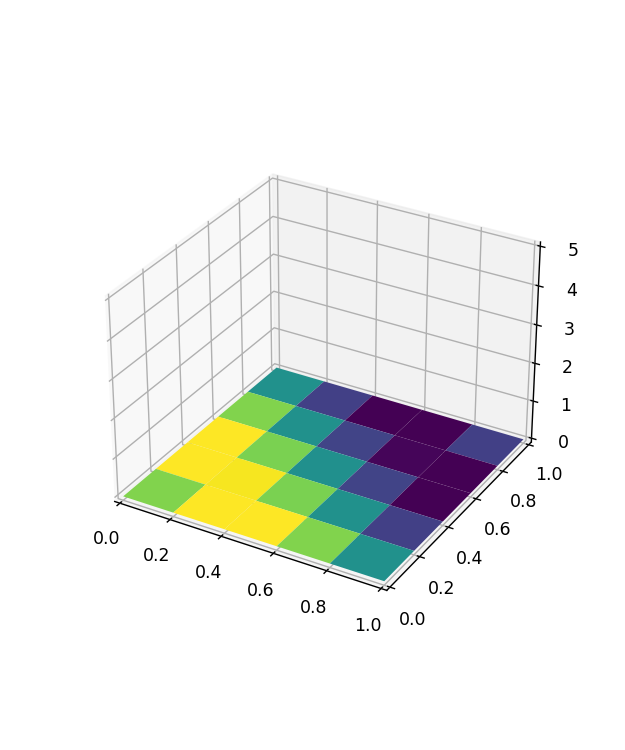

In [8]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,5)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)